In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# load csv file of all binding energies

df = pd.read_csv('raw4.csv')

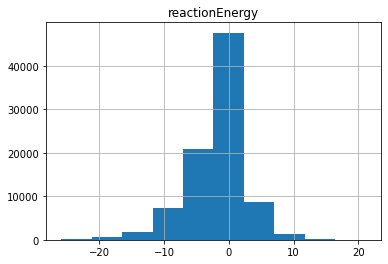

In [6]:
hist = df.hist(column='reactionEnergy', bins=10)

In [4]:
# sort df by chemistry composition, then by reaction

df = df.sort_values(by=['Equation', 'chemicalComposition', 'reactionEnergy'])
df

,chemicalComposition,Equation,sites,reactionEnergy,facet
483,Ag12,0.5H2(g) + * -> H*,"{""H"": ""hollow|A_A_A|FCC""}",0.338155,111
485,Ag12,0.5H2(g) + * -> H*,"{""H"": ""hollow|A_A_A|HCP""}",0.355347,111
482,Ag12,0.5H2(g) + * -> H*,"{""H"": ""bridge|A_A|A""}",0.462215,111
486,Ag12,0.5H2(g) + * -> H*,"{""H"": ""top|A""}",0.844867,111
83758,Ag3Al9,0.5H2(g) + * -> H*,"{""H"": ""bridge|A_A|B""}",0.336242,111
...,...,...,...,...,...
62727,Zn12,SO2(g) + 3* -> 2O* + S*,"{""O"": ""hollow"", ""S"": ""hollow""}",-2.730186,111
43753,Zn3Zr9,SO2(g) + 3* -> 2O* + S*,"{""O"": ""hollow"", ""S"": ""hollow""}",-12.128811,111
47208,Zn6Zr6,SO2(g) + 3* -> 2O* + S*,"{""O"": ""bridge"", ""S"": ""hollow""}",-10.148373,101
72740,Zn9Zr3,SO2(g) + 3* -> 2O* + S*,"{""O"": ""hollow"", ""S"": ""hollow""}",-7.576876,111


In [23]:
df.to_csv('raw4sorted.csv', index=False)

In [5]:
# drop the duplicate energies, keeping the reaction with lowest energy
df = df.drop_duplicates(subset=['chemicalComposition', 'Equation'])
df = df.sort_values(by=['Equation', 'chemicalComposition', 'reactionEnergy'])
df.to_csv('raw4sorted2.csv', index=False)

In [6]:
# calculate H adsorption energies for all chemical compositions

# sort by chemical composition
df = df.sort_values(by=['chemicalComposition'])
df


,chemicalComposition,Equation,sites,reactionEnergy,facet
483,Ag12,0.5H2(g) + * -> H*,"{""H"": ""hollow|A_A_A|FCC""}",0.338155,111
63253,Ag12,H2O* + * -> OH* + H*,"{""H"": ""hollow"", ""OH"": ""hollow"", ""H2O"": ""hollow""}",1.021472,111
62439,Ag12,H2O2(g) + 4* -> 2H* + 2O*,"{""H"": ""hollow"", ""O"": ""hollow""}",1.120107,111
62451,Ag12,H2S(g) + 3* -> 2H* + S*,"{""H"": ""hollow"", ""S"": ""hollow""}",0.383140,111
943,Ag12,H2S(g) - 0.5H2(g) + * -> SH*,"{""SH"": ""hollow|A_A_A|FCC""}",-0.082563,111
...,...,...,...,...,...
62422,Zr12,OCHOH(g) + 5* -> C* + 2H* + 2O*,"{""C"": ""hollow"", ""H"": ""hollow"", ""O"": ""hollow""}",-9.498324,111
22964,Zr12,CH4(g) - 2.0H2(g) + * -> C*,"{""C"": ""hollow|A_A_A|HCP""}",1.262184,111
62769,Zr12,SH* + * -> H* + S*,"{""H"": ""hollow"", ""S"": ""hollow"", ""SH"": ""hollow""}",-2.132702,111
22999,Zr12,H2S(g) - H2(g) + * -> S*,"{""S"": ""hollow|A_A_A|FCC""}",-3.293783,111


In [7]:

# H adsorption is simply the h2 gas phase equation, denoted by the string "0.5H2(g) + * -> H*"
# find all occurrances of this reaction

df_h2 = df.loc[df['Equation'] == "0.5H2(g) + * -> H*"]
df_n2 = df.loc[df['Equation'] == "0.5N2(g) + * -> N*"]
df_ch4 = df.loc[df['Equation'] == "CH4(g) + 5* -> C* + 4H*"]
df_h2o = df.loc[df['Equation'] == "H2O(g) + 3* -> 2H* + O*"]
df_h2s = df.loc[df['Equation'] == "H2S(g) + 3* -> 2H* + S*"]

In [8]:
df_h2

,chemicalComposition,Equation,sites,reactionEnergy,facet
483,Ag12,0.5H2(g) + * -> H*,"{""H"": ""hollow|A_A_A|FCC""}",0.338155,111
83758,Ag3Al9,0.5H2(g) + * -> H*,"{""H"": ""bridge|A_A|B""}",0.336242,111
28765,Ag3Au9,0.5H2(g) + * -> H*,"{""H"": ""hollow|A_A_A|FCC""}",0.321487,111
23545,Ag3Bi9,0.5H2(g) + * -> H*,"{""H"": ""hollow-tilt|A_A_B|FCC""}",0.561943,111
83091,Ag3Cd9,0.5H2(g) + * -> H*,"{""H"": ""bridge|A_B|A""}",0.776155,111
...,...,...,...,...,...
23091,Zn12,0.5H2(g) + * -> H*,"{""H"": ""hollow|A_A_A|FCC""}",0.552737,111
24340,Zn3Zr9,0.5H2(g) + * -> H*,"{""H"": ""hollow|A_A_A|FCC""}",-1.047819,111
24390,Zn6Zr6,0.5H2(g) + * -> H*,"{""H"": ""hollow|A_B_B|FCC""}",-0.749997,101
82527,Zn9Zr3,0.5H2(g) + * -> H*,"{""H"": ""bridge|A_B|A""}",-0.370639,111


In [9]:
# remove all non energy columns
df_h2 = df_h2.drop(columns=['Equation', 'sites', 'facet'])
df_n2 = df_n2.drop(columns=['Equation', 'sites', 'facet'])
df_h2s = df_h2s.drop(columns=['Equation', 'sites', 'facet'])
df_h2o = df_h2o.drop(columns=['Equation', 'sites', 'facet'])
df_ch4 = df_ch4.drop(columns=['Equation', 'sites', 'facet'])

# rename all energy columns to be non redundant
df_h2 = df_h2.rename(columns={'reactionEnergy':'h2energy'})
df_n2 = df_n2.rename(columns={'reactionEnergy':'n2energy'})
df_h2o = df_h2o.rename(columns={'reactionEnergy':'h2oenergy'})
df_h2s = df_h2s.rename(columns={'reactionEnergy':'h2senergy'})
df_ch4 = df_ch4.rename(columns={'reactionEnergy':'ch4energy'})





In [10]:
# merge all df into one master df, based on if chemical composition exists across all the dfs
mdf = df_h2.merge(df_ch4, on='chemicalComposition')
mdf = mdf.merge(df_h2s, on='chemicalComposition')
mdf = mdf.merge(df_n2, on='chemicalComposition')
mdf = mdf.merge(df_h2o, on='chemicalComposition')

mdf



,chemicalComposition,h2energy,ch4energy,h2senergy,n2energy,h2oenergy
0,Ag12,0.338155,6.961600,0.383140,3.112394,2.638110
1,Ag3Al9,0.336242,3.832912,-0.886677,-1.208687,-1.247084
2,Ag3Au9,0.321487,5.951248,0.397908,2.662811,2.930120
3,Ag3Cd9,0.776155,8.681553,1.140841,2.404604,2.545905
4,Ag3Co9,-0.365845,0.476879,-2.801785,-0.411461,-1.234676
...,...,...,...,...,...,...
1484,Zn12,0.552737,6.700048,0.204914,1.127733,1.184199
1485,Zn3Zr9,-1.047819,-2.851123,-5.341111,-2.726808,-5.543771
1486,Zn6Zr6,-0.749997,-1.893216,-4.334818,-1.870297,-4.168913
1487,Zn9Zr3,-0.370639,1.606872,-3.004912,-0.584043,-2.404360


In [37]:
# calculate the element C, N, O, S, H binding energies from master dataframe

# hydrogen binding energy is just h2energy
bindingdf = mdf.assign(hbind = mdf['h2energy'], nbind = mdf['n2energy'], 
            obind = mdf['h2oenergy'] - 2*mdf['h2energy'], sbind = mdf['h2senergy'] - 2*mdf['h2energy'], cbind = mdf['ch4energy'] - 4*mdf['h2energy'])


(-5.0, 4.0)

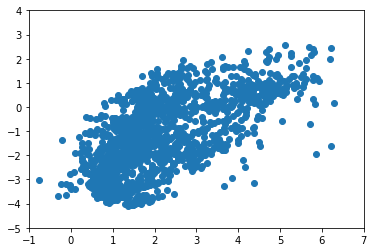

In [38]:
# visualize data by plotting 2d column slices of all compositions

plt.scatter(bindingdf['cbind'], bindingdf['obind'])
plt.xlim([-1,7])
plt.ylim([-5,4])

(-5.0, 4.0)

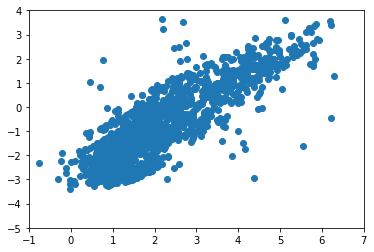

In [39]:
plt.scatter(bindingdf['cbind'], bindingdf['nbind'])
plt.xlim([-1,7])
plt.ylim([-5,4])

In [40]:
# export binding energy dataframe to new csv
bindingdf.to_csv('dft_binding_energies.csv', index=False)


In [12]:
# locate the ch* binding energy equation and export
df_ch = mdf.assign(ch = mdf['ch4energy'] - 1.5*mdf['h2energy'])
df_ch

,chemicalComposition,h2energy,ch4energy,h2senergy,n2energy,h2oenergy,ch
0,Ag12,0.338155,6.961600,0.383140,3.112394,2.638110,6.454367
1,Ag3Al9,0.336242,3.832912,-0.886677,-1.208687,-1.247084,3.328549
2,Ag3Au9,0.321487,5.951248,0.397908,2.662811,2.930120,5.469017
3,Ag3Cd9,0.776155,8.681553,1.140841,2.404604,2.545905,7.517320
4,Ag3Co9,-0.365845,0.476879,-2.801785,-0.411461,-1.234676,1.025647
...,...,...,...,...,...,...,...
1484,Zn12,0.552737,6.700048,0.204914,1.127733,1.184199,5.870942
1485,Zn3Zr9,-1.047819,-2.851123,-5.341111,-2.726808,-5.543771,-1.279393
1486,Zn6Zr6,-0.749997,-1.893216,-4.334818,-1.870297,-4.168913,-0.768220
1487,Zn9Zr3,-0.370639,1.606872,-3.004912,-0.584043,-2.404360,2.162830


In [15]:
# save ch binding energy to another csv
exdf = df_ch['ch']

exdf.to_csv('ch_binding_energy')